In [25]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import yfinance as yf

### 1. Превземање на историски податоци од Yahoo Finance

In [26]:
data = yf.download('ETH-USD')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


### 2. Статистички детали на превземените податоци

In [27]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03
mean,469.878305,488.033535,449.685069,471.140080,471.140080,7.527605e+09
std,755.217979,786.180798,719.857745,756.990273,756.990273,1.083294e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,14.432350,14.955950,13.790200,14.452650,14.452650,4.461605e+07
50%,206.533997,211.828384,200.602982,206.733536,206.733536,2.350620e+09
75%,430.977997,442.548996,416.249619,431.656006,431.656006,1.061924e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,4168.701172,8.448291e+10


### 3. Приказ на податоците на график
- Важни параметри ни се датумот и цената на затворање
- Индекс на цената на затворање е датумот кој се прикажува на x-оската

In [28]:
df = data['Close']
df

Date
2015-08-07       2.772120
2015-08-08       0.753325
2015-08-09       0.701897
2015-08-10       0.708448
2015-08-11       1.067860
                 ...     
2021-09-18    3432.018311
2021-09-19    3329.447998
2021-09-20    2958.993408
2021-09-21    2764.431152
2021-09-22    2945.566895
Name: Close, Length: 2235, dtype: float64

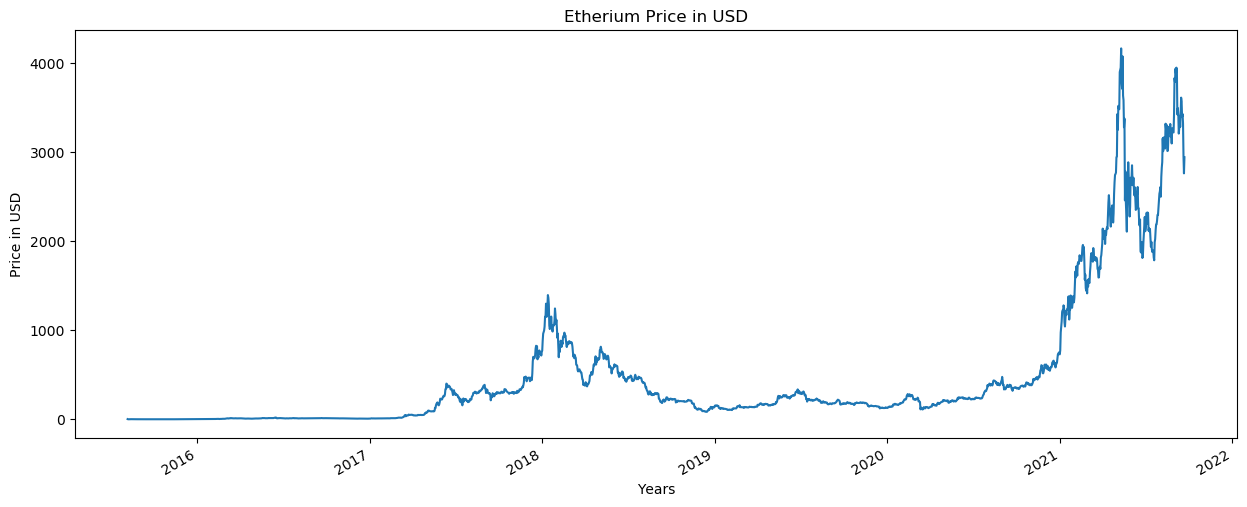

In [29]:
df.sort_index(inplace=True)
df.plot(title="Etherium Price in USD",figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Price in USD')
plt.show()

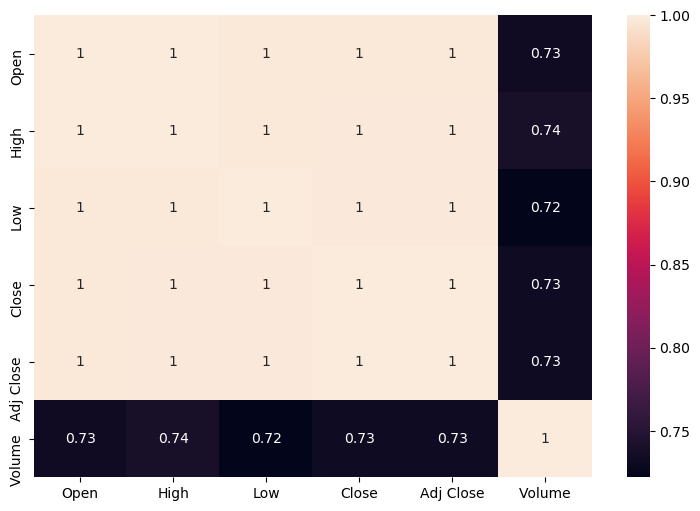

In [30]:
import seaborn as sns
corr1 = data.corr(method='pearson', min_periods=1)
plt.figure(figsize=(9,6))

sns.heatmap(corr1,annot=True)
plt.show()

In [31]:
eth_data = df.dropna()
eth_data.index = pd.to_datetime(df.index)
eth_data = eth_data['2016-08-01':'2021-08-01']
eth_data.describe()

count    1823.000000
mean      483.335075
std       658.763087
min         6.821660
25%       142.245430
50%       235.483810
75%       469.642487
max      4168.701172
Name: Close, dtype: float64

## Проверка на rolling mean и rolling standard variance
- Rolling mean е просекот помеѓу два секвенциални вредности од податоците. За секој прозорец од податоците се пресметува просек
- Пример ако податокот е [1, 2, 3, 4, 5] со големина на прозорец од 2 ќе биде [1, 1.5, 2.5, 3.5, 4.5]

- со помош на Moving Standard Deviation правиме мерење на волатилноста на пазарот. Тоа не ни овозможува предвидување на цената, но е добар индикатор кој ни дава во која насока би се движела цената.

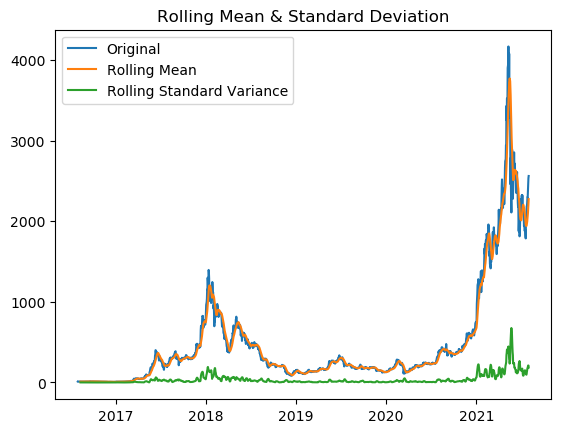

In [32]:
# plot the 12-Month Moving Rolling Mean, Variance 
# Rolling Statistics
rolmean = eth_data.rolling(window=12).mean()
rolvar = eth_data.rolling(window=12).std()

plt.plot(eth_data, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### 4. Тестирање на стационарност на податоците со помош на Dickey-Fuller статистички тест

- Очигледно е дека податоците не се стационарни, односно имаат растечки тренд. Во секој временски интервал средната вредност е различна

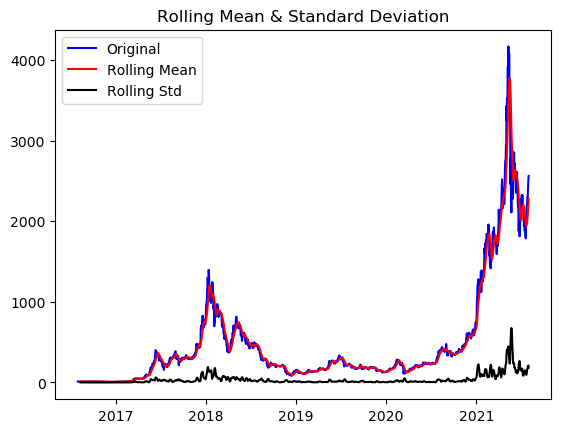

ADF Stastistic: -0.050343
p-value: 0.954165
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [33]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=12,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
     
test_stationarity(eth_data)

### Заклучок: 
- Вредноста на статистичкиот тест е многу поголем од критичната вредност, со не можеме да ја одфрламе нултата хипотеза H0.
- Графикот не е стационарен

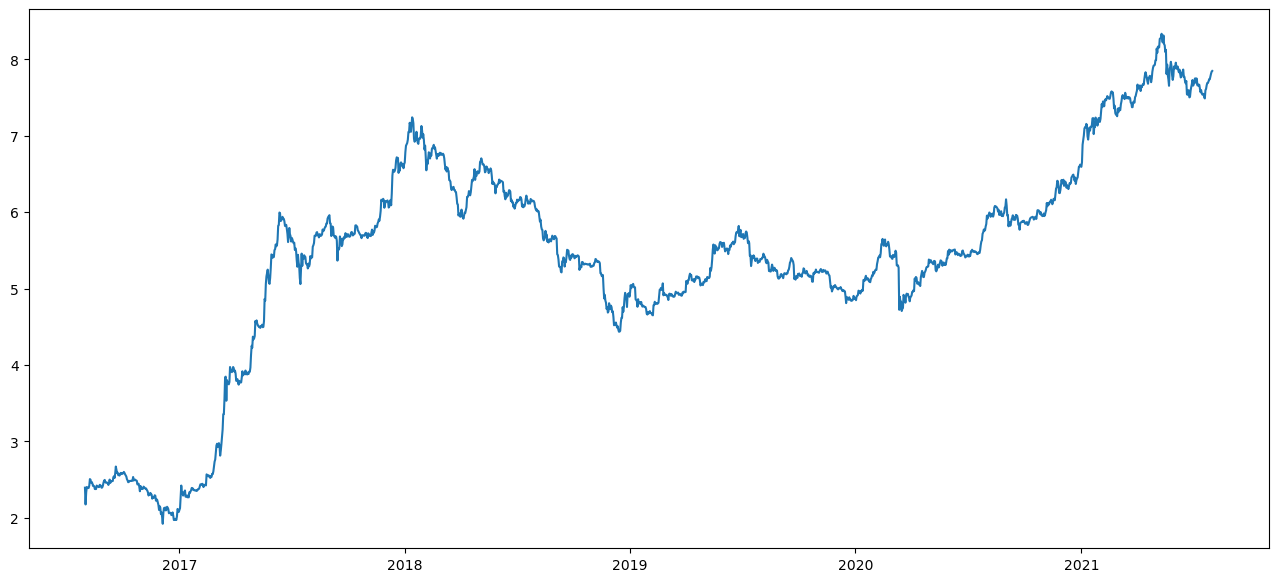

In [34]:
# da se napravi stacionarna vremenskata serija
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(eth_data)
plt.plot(ts_log)
plt.show()

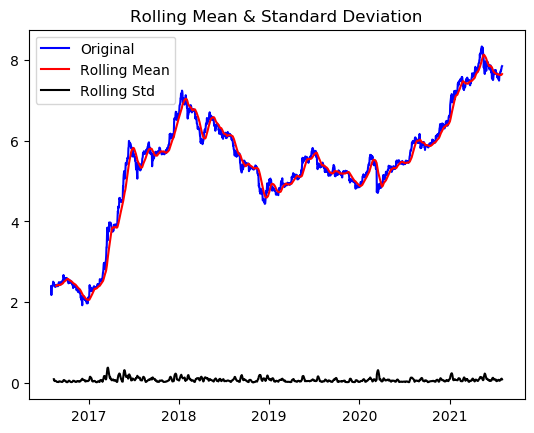

ADF Stastistic: -1.330737
p-value: 0.614995
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [35]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
     
test_stationarity(ts_log)

c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


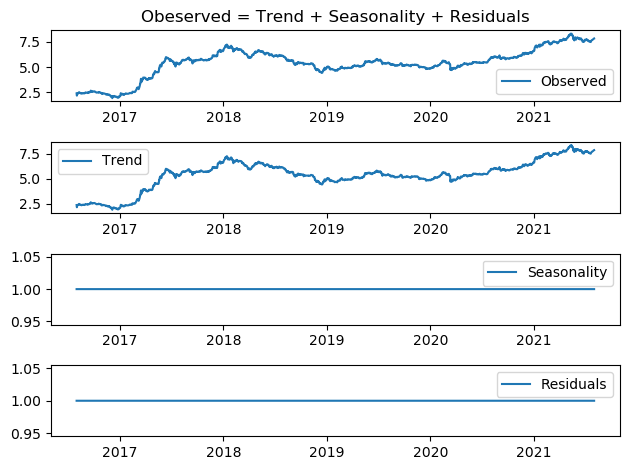

In [36]:
# pak ne e stacionaren morame da napravime dekompozicija
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
#ts_log_decompose = residual
#ts_log_decompose.fillna(inplace=True)
#test_stationarity(ts_log_decompose)
decomposition = seasonal_decompose(ts_log, freq = 1,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.title('Obeserved = Trend + Seasonality + Residuals')
plt.plot(ts_log,label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

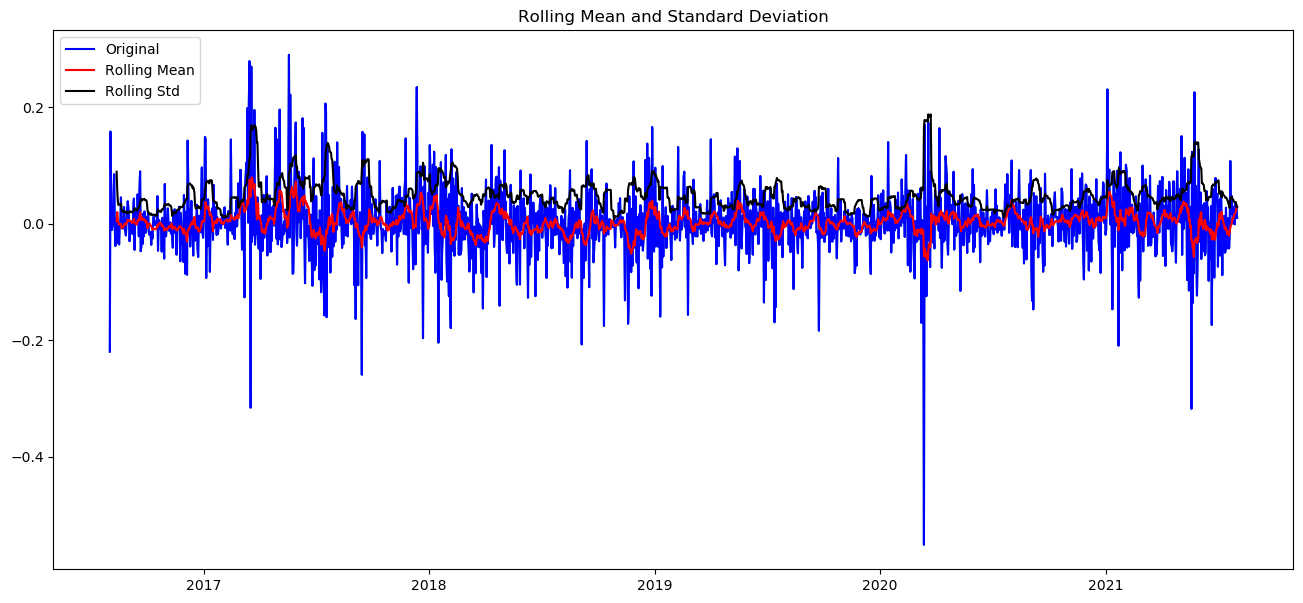

In [37]:
# differencing

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

# rolling statistics

rolLmean = ts_log_diff.rolling(window=12).mean()
rolLstd = ts_log_diff.rolling(window=12).std()

#plot rolling statistics

orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red',label='Rolling Mean')
std = plt.plot(rolLstd, color='black',label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [38]:
eth_data.sort_index(inplace=True)

In [39]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


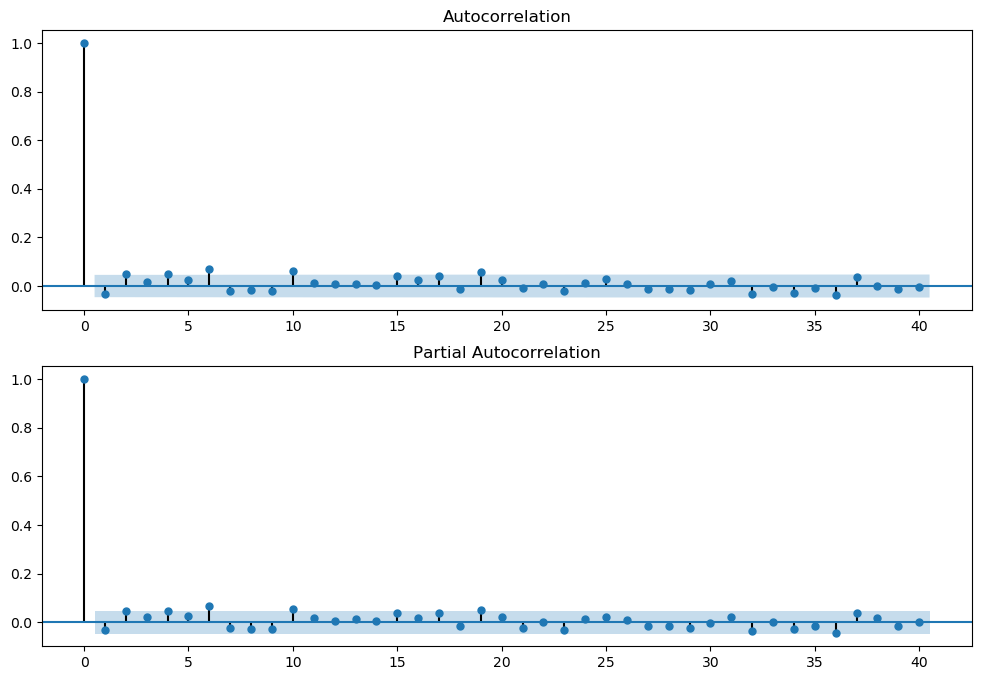

In [40]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = smt.graphics.plot_acf(ts_log_diff.dropna(), lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig = smt.graphics.plot_pacf(ts_log_diff.dropna(), lags=40, ax=ax2)
plt.show()

c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


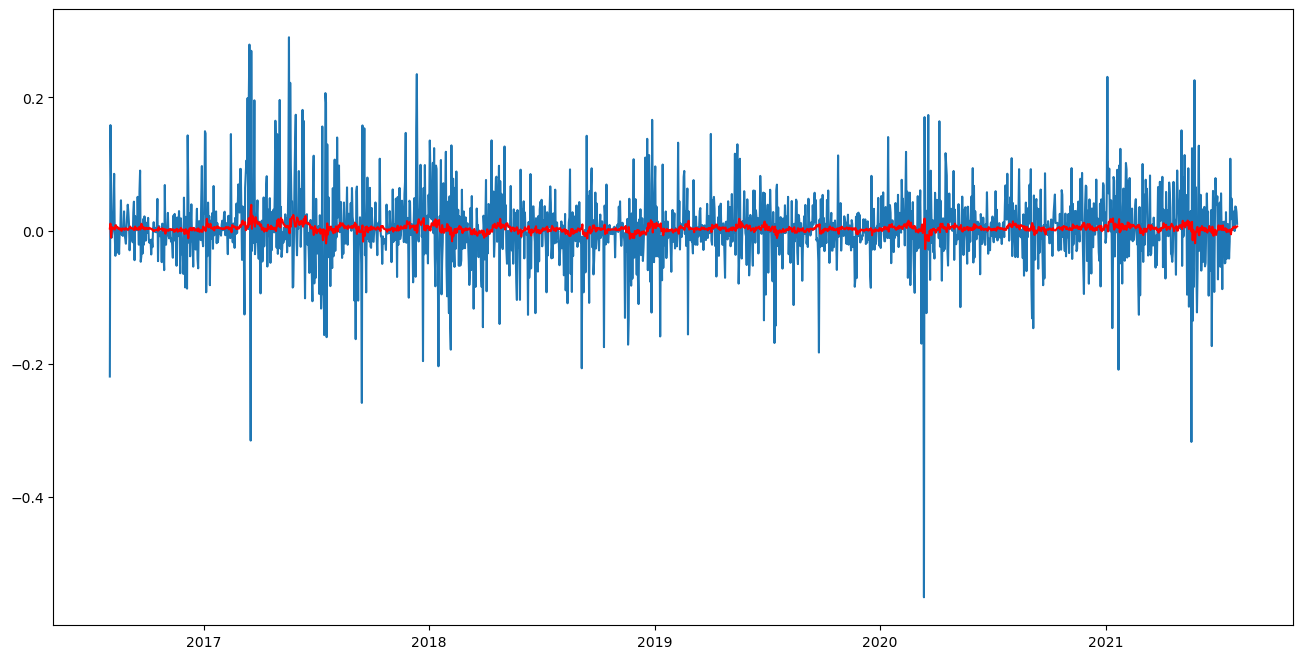

In [41]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(2,1,1))
results = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues,color='red')
plt.show()

In [42]:
ARIMA_diff_predictions = pd.Series(results.fittedvalues,copy=True)
ARIMA_diff_predictions

Date
2016-08-02    0.003028
2016-08-03    0.010294
2016-08-04   -0.010700
2016-08-05   -0.000578
2016-08-06    0.004928
                ...   
2021-07-28    0.004409
2021-07-29    0.006141
2021-07-30    0.004270
2021-07-31    0.005169
2021-08-01    0.006210
Length: 1822, dtype: float64

In [43]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
ARIMA_diff_predictions_cumsum

Date
2016-08-02    0.003028
2016-08-03    0.013321
2016-08-04    0.002621
2016-08-05    0.002043
2016-08-06    0.006971
                ...   
2021-07-28    5.441417
2021-07-29    5.447558
2021-07-30    5.451828
2021-07-31    5.456997
2021-08-01    5.463207
Length: 1822, dtype: float64

In [44]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum, fill_value=0)
ARIMA_log_prediction.head()

Date
2016-08-01    2.392572
2016-08-02    2.395600
2016-08-03    2.405893
2016-08-04    2.395193
2016-08-05    2.394615
dtype: float64

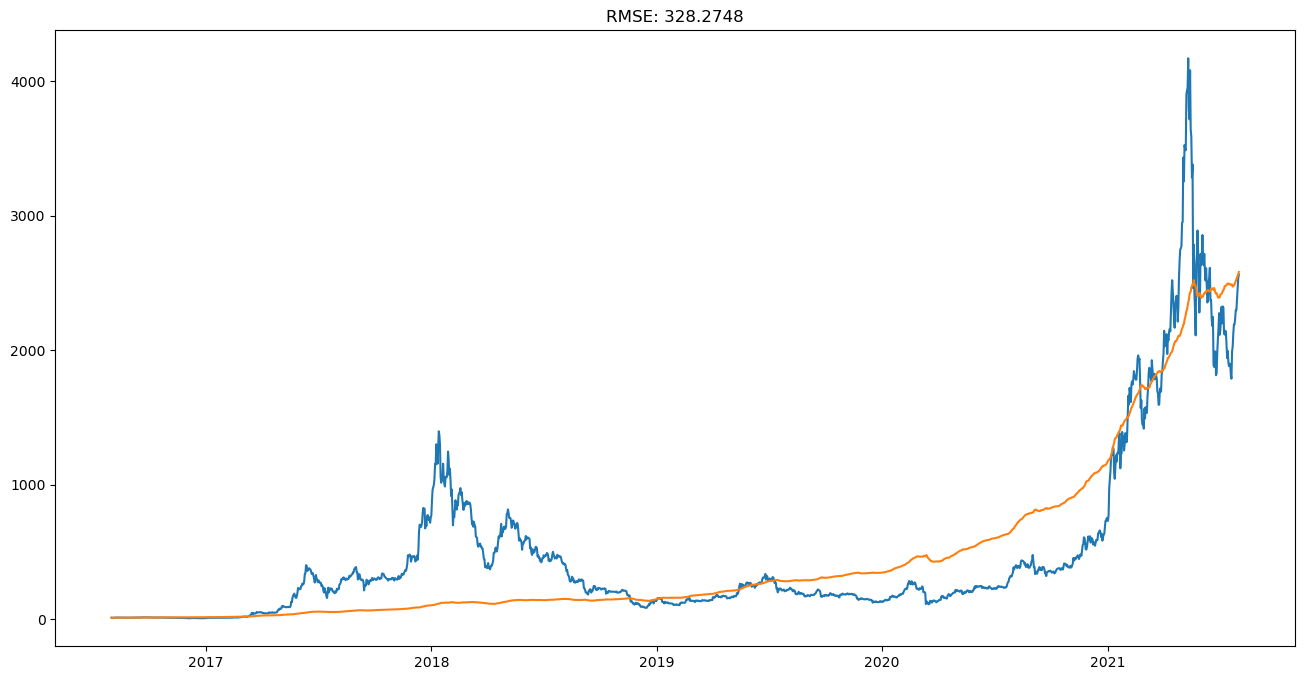

In [45]:
plt.figure(figsize=(16,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(eth_data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-eth_data)**2)/len(eth_data)))
plt.show()

In [46]:

import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [47]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5316.368, Time=5.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5311.331, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5311.221, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5311.048, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5308.178, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5318.803, Time=9.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5317.917, Time=5.49 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5319.512, Time=5.81 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5319.614, Time=5.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5313.457, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5314.207, Time=3.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-5311.982, Time=1.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5319.833, Time=4.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5313.632, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [48]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


predicted = 2376.772919,   expected = 2211.625732,   error = 7.467230  %
predicted = 2224.896989,   expected = 2316.059570,   error = 3.936107  %
predicted = 2317.613930,   expected = 2534.481689,   error = 8.556691  %
predicted = 2537.386604,   expected = 2662.865234,   error = 4.712166  %
predicted = 2676.230185,   expected = 2746.380127,   error = 2.554269  %
predicted = 2764.779436,   expected = 2756.876953,   error = 0.286646  %
predicted = 2778.539328,   expected = 2773.207031,   error = 0.192279  %
predicted = 2793.638895,   expected = 2945.892822,   error = 5.168346  %
predicted = 2962.725511,   expected = 2952.056152,   error = 0.361421  %
predicted = 2977.572604,   expected = 3431.086182,   error = 13.217785  %
predicted = 3446.433785,   expected = 3253.629395,   error = 5.925825  %
predicted = 3299.356813,   expected = 3522.783203,   error = 6.342326  %
predicted = 3550.135590,   expected = 3490.880371,   error = 1.697429  %
predict

c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 1862.444084,   expected = 1989.736328,   error = 6.397443  %
predicted = 1973.299064,   expected = 1988.456299,   error = 0.762261  %
predicted = 1982.593956,   expected = 1813.217285,   error = 9.341223  %
predicted = 1815.035041,   expected = 1829.239258,   error = 0.776509  %
predicted = 1818.965906,   expected = 1978.894653,   error = 8.081721  %
predicted = 1965.040832,   expected = 2079.657471,   error = 5.511323  %
predicted = 2074.757575,   expected = 2160.768311,   error = 3.980563  %
predicted = 2161.173594,   expected = 2274.547607,   error = 4.984464  %
predicted = 2277.387111,   expected = 2113.605469,   error = 7.748922  %
predicted = 2129.255019,   expected = 2150.040283,   error = 0.966738  %
predicted = 2152.584222,   expected = 2226.114258,   error = 3.303067  %
predicted = 2228.770244,   expected = 2321.724121,   error = 4.003657  %
predicted = 2326.738919,   expected = 2198.582520,   error = 5.829047  %
predicted = 2214.000045,   expected = 2324.679443, 

c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\brank\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


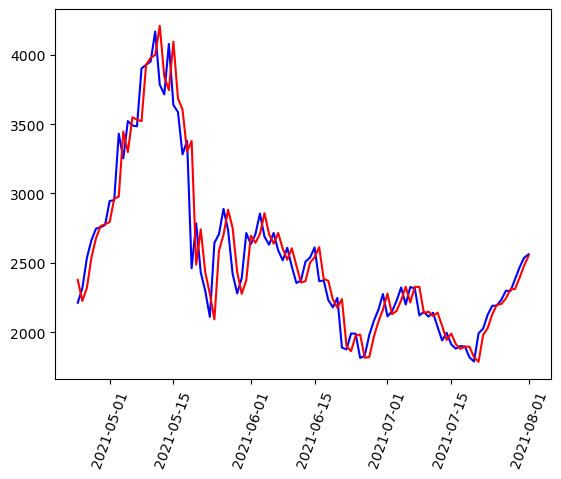

In [49]:
date = ts_log.index
plt.plot(test_arima.index,originals,color='blue')
plt.plot(test_arima.index,predictions,color='red')
plt.xticks(rotation=70)
plt.show()

In [50]:
rmse = sqrt(mean_squared_error(originals, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 191.127
